In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## 1. 2D DFT

Image used : http://sipi.usc.edu/database/database.php?volume=misc&image=32#top

In [2]:
image_path = "Desktop/7.1.08.tiff"
img = plt.imread(image_path)

In [3]:
def crop(img,N):   
    J = np.zeros(shape=(N,N))
    for i in range(N):
        for j in range(N):
            J[i,j] = img[i,j]
    return J

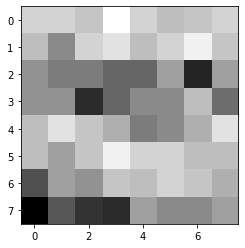

In [4]:
img_crop = crop(img,8)
plt.imshow(img_crop,cmap='gray')

### 1. DFT from first principles

In [90]:
def DFT(img):
    a,b = img.shape
    J = 1j*np.zeros(img.shape)
    for i in range(a):
        for j in range(b):
            for u in range(a):
                for v in range(b):
                    J[u,v] += img[i,j]*np.exp(-1j*2*np.pi*(u*i/a + v*j/b))
    J = np.array(J,dtype=complex)
    return J

In [91]:
dft_fp = DFT(img_crop)
#print(dft_fp)

### 2. DFT using Matrix Multiplication

In [92]:
def omega(N):
    return np.exp((-1j*2*np.pi)/N)

In [8]:
J = np.zeros(shape=(10,10))
for i in range(10):
    for j in range(10):
        J[i][j] = i*j
print(J)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
 [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27.]
 [ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36.]
 [ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  7. 14. 21. 28. 35. 42. 49. 56. 63.]
 [ 0.  8. 16. 24. 32. 40. 48. 56. 64. 72.]
 [ 0.  9. 18. 27. 36. 45. 54. 63. 72. 81.]]


In [68]:
def DFT_matrix(img):
    m,n = img.shape
    W = 1j*np.zeros(shape=(m,n))
    om = omega(m)
    #J =np.zeros(m,n)
    for i in range(m):
        for j in range(n):
            W[i,j]= np.power(om,i*j)
    J = W*img*W 
    return J

In [10]:
dft_mat = DFT_matrix(img_crop)

### 1. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.

In [11]:
def phase(dft):
    phase = np.zeros(dft.shape)
    for i in range(dft.shape[0]):
        for j in range(dft.shape[1]):
            phase[i,j] = np.angle(dft[i,j])
    return phase    

Text(0.5, 1.0, 'Phase')

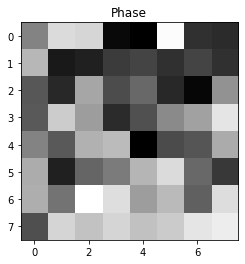

In [67]:
ph_mat = phase(dft_fp)
plt.imshow(ph_mat,cmap='gray')
plt.title('Phase')

In [64]:
def magnitude(dft):
    mag = np.zeros(dft.shape)
    for i in range(dft.shape[0]):
        for j in range(dft.shape[1]):
            mag[i,j]=np.abs(dft[i,j])
    return mag

In [65]:
def lin_point(P,I,L):
    J = np.uint8(P*I+L)
    return J  

In [66]:
def FSCS(img):
    K = 256
    I = img.reshape(-1)
    B = max(I)
    A = min(I)
    P = (K-1)/(B-A)
    L = -A*P
    J = lin_point(P,img,L)
    return J  

Text(0.5, 1.0, 'Magnitude')

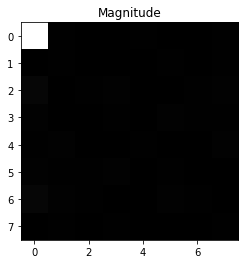

In [63]:
mag = magnitude(dft_fp)
plt.imshow(mag,cmap='gray')
plt.title('Magnitude')

Text(0.5, 1.0, 'Magnitude subject to Log Transformation')

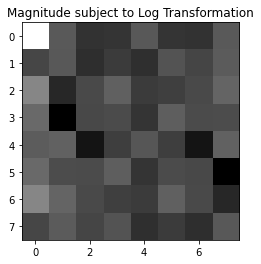

In [62]:
mag_log = FSCS(np.log(1+mag))
plt.imshow(mag_log,cmap='gray')
plt.title('Magnitude subject to Log Transformation')

In [ ]:
'''
def centered_dft(img):
    N,M = img.shape
    N = int(np.floor(N/2))
    M = int(np.floor(M/2))
    J = np.zeros(img.shape)
    for i in range(N):
        for j in range(M):
            if (i-N>=0 and j-M>=0):
                J[i,j] = img[i-N,j-M]
    return J.astype(int)
'''

### 2.Generate the centered DFT using (−1)**i+j* I and display its magnitude.

In [69]:
temp = np.zeros(img_crop.shape)
for i in range(img_crop.shape[0]):
    for j in range(img_crop.shape[1]):
        temp[i,j] = np.power(-1,i+j)*img_crop[i,j]

Text(0.5, 1.0, 'Centered DFT')

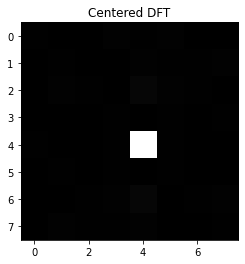

In [71]:
cn_dft = DFT(temp)
cn_mag = magnitude(cn_dft)
plt.imshow(cn_mag,cmap='gray')
plt.title('Centered DFT')

### 3. Verify that IDFT[DFT[I]] = I.

In [93]:
def IDFT(img):
    a,b = img.shape
    J = 1j*np.zeros(img.shape)
    for i in range(a):
        for j in range(b):
            for u in range(a):
                for v in range(b):
                    J[u,v] += img[i,j]*np.exp(-1j*2*np.pi*((-u*i)/a + (-v*j)/b))
    J = J/(a*b)
    return J

/home/varshi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0.5, 1.0, 'Original Image')

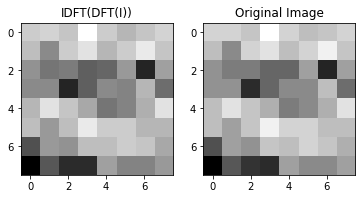

In [94]:
I11 = DFT(img_crop)
I2 = np.uint8(IDFT(I11))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(I2,cmap='gray')
ax2.imshow(img_crop,cmap='gray')
ax1.title.set_text('IDFT(DFT(I))')
plt.title("Original Image")

### 4.Show the importance of phase by transposing the phase matrix and then synthesizing the image. Repeat by a) setting the phase to 0, and b) by adding noise.

/home/varshi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Resynthesized')

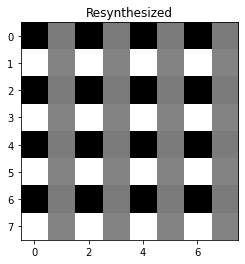

In [74]:
ph_matT = (ph_mat).T
newph = ph_matT*mag_log
newph = IDFT(newph).astype(float)
plt.imshow(newph,cmap='gray')
plt.title('Resynthesized')

/home/varshi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '0 Phase')

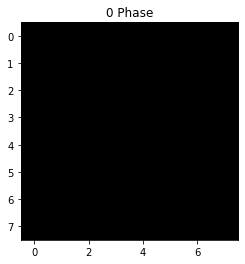

In [75]:
ph_matT = [0]*ph_matT
newph = ph_matT*mag_log
newph = IDFT(newph).astype(float)
plt.imshow(newph,cmap='gray')
plt.title('0 Phase')

/home/varshi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Added noise')

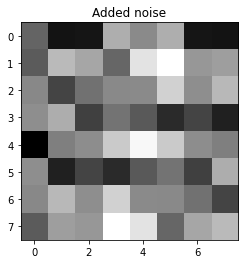

In [76]:
noise = np.random.normal(0,6,ph_mat.shape)
new = noise+ph_matT
newph = new*mag_log
newph = IDFT(newph).astype(float)
plt.imshow(newph,cmap='gray')
plt.title('Added noise')

## 2. PERIODIC CONVOLUTION

### 1. Circulary convolve two images. Test your program by using an image and an averaging filter of size 5 × 5.

In [77]:
I1 = crop(img,8)

In [78]:
def circular_convolution(I1,I2):
    J = np.zeros(I1.shape)
    a,b = I1.shape
    for i in range(a):
        for j in range(b):
            for p in range(a):
                for q in range(b):
                    if(i-p>=0 and j-q>=0):
                        m = int((i-p)%a)
                        n = int((j-q)%b)
                        J[i,j] += I1[m,n]*I2[p,q]
    return J

In [28]:
avg_filter = np.zeros(I1.shape)
for i in range(5):
    for j in range(5):
        avg_filter[i,j] = 1/(5*5)
for i in range(5,I1.shape[0]):
    for j in range(5,I1.shape[1]):
        avg_filter[i,j] = 0

Text(0.5, 1.0, 'Circularly Convolved Image and Filter')

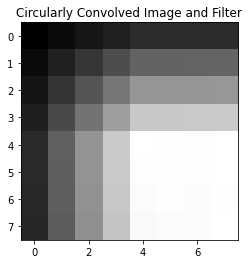

In [79]:
im2 = circular_convolution(I1,avg_filter)
plt.imshow(im2,cmap='gray')
plt.title('Circularly Convolved Image and Filter')

### 2. Linearly convolve the same image and filter using the circular convolution function above after appropriate zero padding.

In [95]:
m,n = I1.shape
m = 2*m
n = 2*n #Initialising a 2n*2n matrix and filling in n*n image
I1_pad = np.zeros(shape=(m,n)) 
I1_pad.shape

(16, 16)

In [96]:
for i in range(int(m/2)):
    for j in range(int(n/2)):
        I1_pad[i,j] = I1[i,j] #Image on first n*n and 
#print(I1_pad) 

In [97]:
avgf = np.zeros(I1_pad.shape)
for i in range(5):
    for j in range(5):
        avgf[i,j] = 1/25
for i in range(5,m):
    for j in range(5,n):
        avgf[i,j] = 0

Text(0.5, 1.0, 'Convolved after Padding')

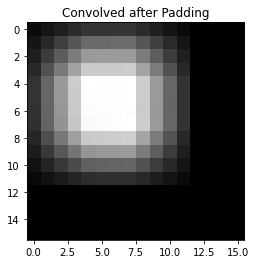

In [84]:
I3 = circular_convolution(I1_pad,avgf)
plt.imshow(I3,cmap='gray')
plt.title('Convolved after Padding') 

### 3. Now, verify that you can perform linear covolution using the DFT of zero padded images.

In [85]:
I1_dft = DFT(I1_pad)
avg_dft = DFT(avgf)
I4 =I1_dft*avg_dft 

/home/varshi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


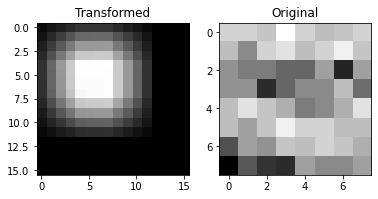

In [86]:
I5 = np.uint8(IDFT(I4))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(I5,cmap='gray')
ax2.imshow(img_crop,cmap='gray')
ax1.title.set_text('Transformed')
ax2.title.set_text('Original')

## 3. Image Denoising using Linear Filters

### 1. Average filter of size M × M. Vary M from 3 to 15 in increments of 2 and observe the tradeoff between denoising and smoothing. What could be an appropriate window size for this noise level?

In [36]:
I = crop(img,64)
mean = 0
sigma = 5
noise = np.random.normal(mean,sigma,I.shape)
obs = I+noise
obs.shape

(64, 64)

In [37]:
def linear_convolution(I1,I2):
    a,b = I1.shape
    J = np.zeros(I1.shape)
    for i in range(a):
        for j in range(b):
            for n in range(a):
                for m in range(b):
                    if(i-n>=0 and i-m>=0):
                        J[i,j] += I1[n,m]*I2[i-n,j-m]
    return J

In [38]:
def average_filter(I1,M):
    J = np.zeros(I1.shape)
    for i in range(0,M):
        for j in range(0,M):
            J[i,j] = 1/(M*M)
    for i in range(M,J.shape[0]):
        for j in range(M,J.shape[1]):
            J[i,j] = 0
    return J

In [39]:
avg1 = average_filter(obs,3)
avg2 = average_filter(obs,5)
avg3 = average_filter(obs,7)
avg4 = average_filter(obs,9)
avg5 = average_filter(obs,11)
avg6 = average_filter(obs,13)
avg7 = average_filter(obs,15)
im1 = linear_convolution(obs,avg1)
im2 = linear_convolution(obs,avg2)
im3 = linear_convolution(obs,avg3)
im4 = linear_convolution(obs,avg4)
im5 = linear_convolution(obs,avg5)
im6 = linear_convolution(obs,avg6)
im7 = linear_convolution(obs,avg7)

Text(0.5, 1.0, 'Noised Image')

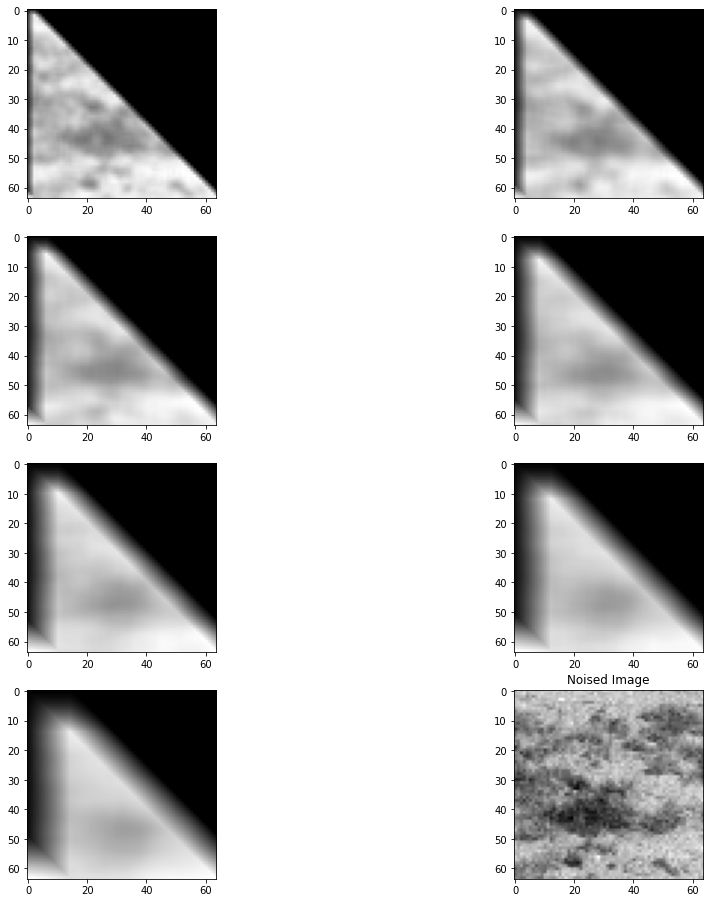

In [40]:
fig,ax = plt.subplots(4,2,figsize=(16,16))
ax[0,0].imshow(im1,cmap='gray')
ax[0,1].imshow(im2,cmap='gray')
ax[1,0].imshow(im3,cmap='gray')
ax[1,1].imshow(im4,cmap='gray')
ax[2,0].imshow(im5,cmap='gray')
ax[2,1].imshow(im6,cmap='gray')
ax[3,0].imshow(im7,cmap='gray')
ax[3,1].imshow(obs,cmap='gray')
plt.title('Noised Image')

 It can be noticed that as M increases the image keeps getting blurred. Hence, smaller window sizes perform better. In this case M=3 could be a suitable choice

### 2. Gaussian filter of size 5 × 5. Experiment with the standard deviation σh of the filter from 0.5 to 5 in steps of 0.5 and observe its effect on denoising.

In [87]:
def gaussian(sigma):
    x = (np.pi*sigma)**2
    N = 5
    H_t= np.zeros(shape=(5,5))
    for i in range(5):
        for j in range(5):
            H_t[i,j] = np.exp(-2*x*((i**2+j**2)/N**2))
    H = IDFT(H_t)
    H_pad = np.zeros(obs.shape)
    for i in range(5):
        for j in range(5):
            H_pad[i,j] = H[i,j]
    for i in range(6,H_pad.shape[0]):
        for j in range(6,H_pad.shape[1]):
            H_pad[i,j] = 0 
    return H_pad

In [42]:
Im1 = linear_convolution(obs,gaussian(0.5))
Im2 = linear_convolution(obs,gaussian(1.0))
Im3 = linear_convolution(obs,gaussian(1.5))
Im4 = linear_convolution(obs,gaussian(2.0))
Im5 = linear_convolution(obs,gaussian(2.5))
Im6 = linear_convolution(obs,gaussian(3.0))
Im7 = linear_convolution(obs,gaussian(3.5))
Im8 = linear_convolution(obs,gaussian(4.0))
Im9 = linear_convolution(obs,gaussian(4.5))
Im10 = linear_convolution(obs,gaussian(5.0))

/home/varshi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


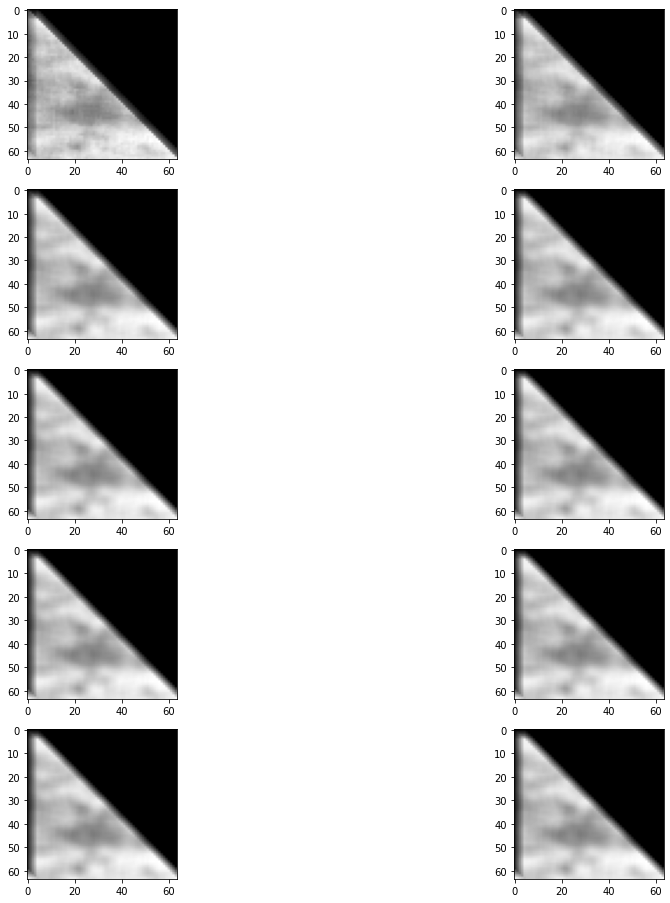

In [88]:
fig,ax = plt.subplots(5,2,figsize=(16,16))
ax[0,0].imshow(Im1,cmap='gray')
ax[0,1].imshow(Im2,cmap='gray')
ax[1,0].imshow(Im3,cmap='gray')
ax[1,1].imshow(Im4,cmap='gray')
ax[2,0].imshow(Im5,cmap='gray')
ax[2,1].imshow(Im6,cmap='gray')
ax[3,0].imshow(Im7,cmap='gray')
ax[3,1].imshow(Im8,cmap='gray')
ax[4,0].imshow(Im9,cmap='gray')
ax[4,1].imshow(Im10,cmap='gray')